# Import Library

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import transform
from skimage import io
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load Raw Image

### Train Image

In [2]:
def loadTrainImages(path='data/Train'):
    classes = [ g for g in os.listdir(path) if os.path.isdir(path + '/' + g)]

    images = []
    labels = []

    for classid in classes:
        image_class_path = os.path.join(path, classid)

        image_files = sorted([os.path.join(image_class_path, file)
                 for file in os.listdir(image_class_path) if file.endswith('.png')])
        
        images.extend(image_files)
        labels.extend([ int(classid) ] * len(image_files))

    return np.array(images), np.array(labels)

In [3]:
train_image, y_train = loadTrainImages()

train_image.shape, y_train.shape

((39209,), (39209,))

### Test Image

In [4]:
def loadTestImages(path='data/Test'):
    image_files = sorted([os.path.join(path, file)
             for file in os.listdir(path) if file.endswith('.png')])

    return np.array(image_files)

In [5]:
test_image = loadTestImages()

In [6]:
y_test = pd.read_csv("Data/Test.csv").ClassId.values

In [7]:
test_image.shape, y_test.shape

((12630,), (12630,))

# Function to Display Image

In [8]:
# Display two image
def displayOrigin(a, b, title1 = "Original", title2=""):    
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])

    plt.show()


# Display two images
def displayOriginGray(a, b, title1 = "Original", title2 = "Grayed"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(b, cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()


def displayBothGray(a, b, title1 = "Grayed", title2 = "Grayed"):
    plt.subplot(121), plt.imshow(a, cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(b, cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# Function to grayscale image

In [24]:
def color2gray(images):
    im_ar=[]

    for im in images:
        image = cv2.imread(im)

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        im = transform.resize(gray, (32, 32))
        im_ar.append(im)

    return np.asarray(im_ar)

In [32]:
# X_train_gray = color2gray(train_image)
# np.save('train_gray.npy', X_train_gray)

In [41]:
X_train_gray.shape, y_train.shape

((39209, 32, 32), (39209,))

In [42]:
# X_test_gray = color2gray(test_image)
# np.save('test_gray.npy', X_gray_train)

In [43]:
X_test_gray.shape, y_test.shape

((12630, 32, 32), (12630,))

# Gaussian Filter

### Select a random image to test

In [ ]:
random_image_file = train_image[800]
random_image = cv2.imread(random_image_file)


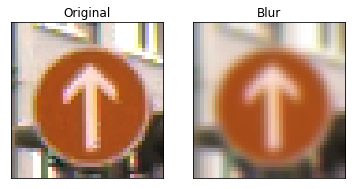

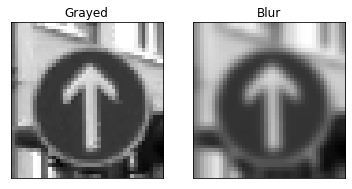

In [14]:
random_image_blur = cv2.GaussianBlur(random_image, (5, 5), 0)
displayOrigin(random_image, random_image_blur, title1='Original', title2='Blur')

random_image_gray = cv2.cvtColor(random_image, cv2.COLOR_BGR2GRAY)
random_image_gray_blur = cv2.GaussianBlur(random_image_gray, (5, 5), 0)
displayBothGray(random_image_gray, random_image_gray_blur, title1='Grayed', title2='Blur')

### Apply Filter on the Original Images

In [57]:
def blurOriginal(image):
    ims=[]

    for im in image:
        blur = cv2.GaussianBlur(cv2.imread(im), (5, 5), 0)
        blur = transform.resize(blur, (32, 32))
        ims.append(blur)

    return np.asarray(ims)

#### Train

In [58]:
X_train_original_blur = blurOriginal(train_image)

# np.save('train_origin_blur.npy', X_train_original_blur)

In [87]:
X_train_original_blur.shape, y_train.shape

((39209, 32, 32, 3), (39209,))

#### Test

In [62]:
X_test_original_blur = blurOriginal(test_image)

# np.save('test_origin_blur.npy', X_test_original_blur)

In [88]:
X_test_original_blur.shape, y_test.shape

((12630, 32, 32, 3), (12630,))

### Apply Filter on the Grayed Images

In [77]:
def blurGray(image):
    ims = []

    for im in image:
        im_gray = cv2.cvtColor(cv2.imread(im), cv2.COLOR_BGR2GRAY)
        im_blur = cv2.GaussianBlur(im_gray, (5, 5), 0)

        im_blur = transform.resize(im_blur, (32, 32))
        ims.append(im_blur)

    return np.asarray(ims)

#### train

In [78]:
X_train_gray_blur = blurGray(train_image)

# np.save('train_gray_blur.npy', X_train_gray_blur)

In [79]:
X_train_gray_blur.shape, y_train.shape

((39209, 32, 32), (39209,))

#### test

In [80]:
X_test_gray_blur = blurGray(test_image)

# np.save('test_gray_blur.npy', X_test_gray_blur)

In [81]:
X_test_gray_blur.shape, y_test.shape

((12630, 32, 32), (12630,))

# Tensorflow

In [83]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))

In [84]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43))

In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

### Learning - Original Image

In [70]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train_original_blur, y_train, epochs=10,validation_data=(X_test_original_blur, y_test))


Epoch 1/10
1226/1226 [==============================] - 25s 21ms/step - loss: 1.4768 - accuracy: 0.6053 - val_loss: 0.9017 - val_accuracy: 0.7793
Epoch 2/10
1226/1226 [==============================] - 25s 20ms/step - loss: 0.4358 - accuracy: 0.8828 - val_loss: 0.7343 - val_accuracy: 0.8340
Epoch 3/10
1226/1226 [==============================] - 24s 20ms/step - loss: 0.2736 - accuracy: 0.9262 - val_loss: 0.7343 - val_accuracy: 0.8437
Epoch 4/10
1226/1226 [==============================] - 26s 22ms/step - loss: 0.2041 - accuracy: 0.9452 - val_loss: 0.6844 - val_accuracy: 0.8667
Epoch 5/10
1226/1226 [==============================] - 25s 20ms/step - loss: 0.1583 - accuracy: 0.9575 - val_loss: 0.6620 - val_accuracy: 0.8801
Epoch 6/10
1226/1226 [==============================] - 24s 19ms/step - loss: 0.1297 - accuracy: 0.9660 - val_loss: 0.6811 - val_accuracy: 0.8747
Epoch 7/10
1226/1226 [==============================] - 25s 20ms/step - loss: 0.1090 - accuracy: 0.9695 - val_loss: 0.6828 -

395/395 - 2s - loss: 0.7319 - accuracy: 0.8976


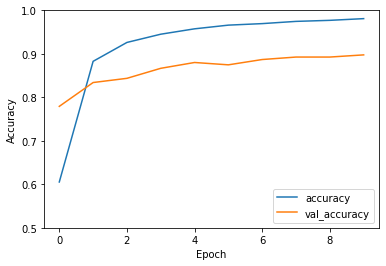

In [71]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test_original_blur,  y_test, verbose=2)

### Learning - Grayed Image

In [90]:
X_train_gray_blur1 = X_train_gray_blur[:, :, :, np.newaxis]

X_test_gray_blur1 = X_test_gray_blur[:, :, :, np.newaxis]


In [91]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))

In [92]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43))

In [93]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [94]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train_gray_blur1, y_train, epochs=10,validation_data=(X_test_gray_blur1, y_test))


Epoch 1/10
1226/1226 [==============================] - 24s 20ms/step - loss: 1.3129 - accuracy: 0.6465 - val_loss: 0.9098 - val_accuracy: 0.7973
Epoch 2/10
1226/1226 [==============================] - 24s 19ms/step - loss: 0.3977 - accuracy: 0.8903 - val_loss: 0.7554 - val_accuracy: 0.8434
Epoch 3/10
1226/1226 [==============================] - 24s 20ms/step - loss: 0.2591 - accuracy: 0.9297 - val_loss: 0.7188 - val_accuracy: 0.8606
Epoch 4/10
1226/1226 [==============================] - 24s 19ms/step - loss: 0.2014 - accuracy: 0.9450 - val_loss: 0.7574 - val_accuracy: 0.8638
Epoch 5/10
1226/1226 [==============================] - 24s 19ms/step - loss: 0.1599 - accuracy: 0.9567 - val_loss: 0.7378 - val_accuracy: 0.8756
Epoch 6/10
1226/1226 [==============================] - 24s 19ms/step - loss: 0.1291 - accuracy: 0.9646 - val_loss: 0.7141 - val_accuracy: 0.8830
Epoch 7/10
1226/1226 [==============================] - 24s 20ms/step - loss: 0.1050 - accuracy: 0.9700 - val_loss: 0.8107 -

395/395 - 2s - loss: 0.8121 - accuracy: 0.8972


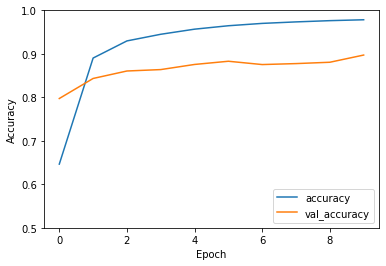

In [95]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test_gray_blur1, y_test, verbose=2)